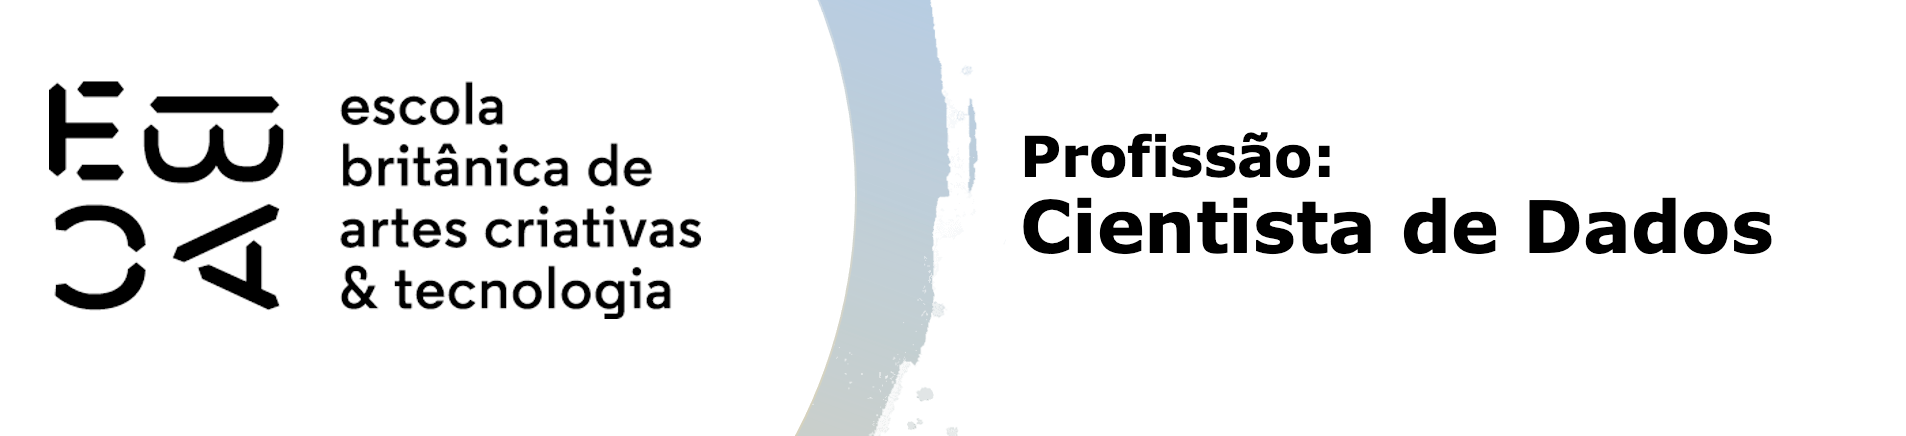

# Tarefa II

Neste projeto, estamos construindo um credit scoring para cartão de crédito, em um desenho amostral com 15 safras, e utilizando 12 meses de performance.

Carregue a base de dados ```credit_scoring.ftr```.

In [92]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.formula.api as smf
import statsmodels.api as sm

from sklearn import metrics
from scipy.stats import ks_2samp
from scipy.stats import t
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

In [93]:
cs = pd.read_feather('credit_scoring.ftr')
cs.head()

,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda,mau
0,2015-01-01,5733,F,N,N,0,Empresário,Médio,Solteiro,Casa,43,6.873973,1.0,2515.39,False
1,2015-01-01,727,F,S,S,0,Assalariado,Médio,Casado,Casa,35,4.526027,2.0,3180.19,False
2,2015-01-01,6374,F,N,N,2,Assalariado,Médio,Casado,Casa,31,0.243836,4.0,1582.29,False
3,2015-01-01,9566,F,N,N,0,Assalariado,Médio,Casado,Casa,54,12.772603,2.0,13721.17,False
4,2015-01-01,9502,F,S,N,0,Assalariado,Superior incompleto,Solteiro,Casa,31,8.432877,1.0,2891.08,False


## Amostragem

Separe os três últimos meses como safras de validação *out of time* (oot).

Variáveis:<br>
Considere que a variável ```data_ref``` não é uma variável explicativa, é somente uma variável indicadora da safra, e não deve ser utilizada na modelagem. A variávei ```index``` é um identificador do cliente, e também não deve ser utilizada como covariável (variável explicativa). As restantes podem ser utilizadas para prever a inadimplência, incluindo a renda.


In [94]:
cs.data_ref.min()

Timestamp('2015-01-01 00:00:00')

In [95]:
cs.data_ref.max()

Timestamp('2016-03-01 00:00:00')

In [96]:
meses = 3
data = pd.Series(pd.date_range('1/1/2016', periods = meses, freq = 'MS'))
date = pd.DataFrame(data)
date = date.rename({0:'oot'}, axis = 'columns')
date

,oot
0,2016-01-01
1,2016-02-01
2,2016-03-01


## Descritiva básica univariada

- Descreva a base quanto ao número de linhas, número de linhas para cada mês em ```data_ref```.
- Faça uma descritiva básica univariada de cada variável. Considere as naturezas diferentes: qualitativas e quantitativas.

In [97]:
print('número de linhas: {0}'.format(cs.shape[0]))
date.value_counts()

número de linhas: 750000


oot       
2016-01-01    1
2016-02-01    1
2016-03-01    1
dtype: int64

In [98]:
cs.data_ref.value_counts()

2015-01-01    50000
2015-02-01    50000
2015-03-01    50000
2015-04-01    50000
2015-05-01    50000
2015-06-01    50000
2015-07-01    50000
2015-08-01    50000
2015-09-01    50000
2015-10-01    50000
2015-11-01    50000
2015-12-01    50000
2016-01-01    50000
2016-02-01    50000
2016-03-01    50000
Name: data_ref, dtype: int64

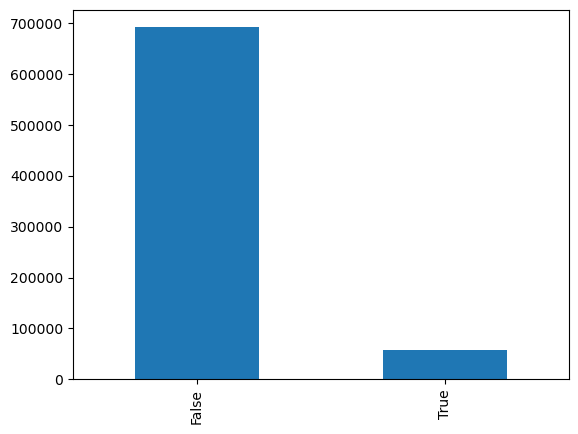

In [99]:
var = 'mau'
grafico_barras = cs[var].value_counts().plot.bar()

In [100]:
cs.sexo.value_counts()

F    504580
M    245420
Name: sexo, dtype: int64

<Figure size 640x480 with 0 Axes>

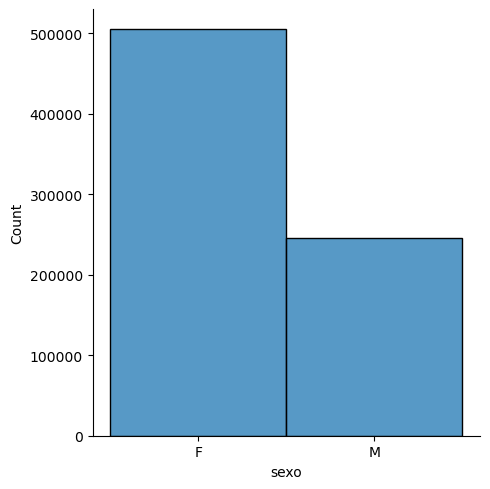

In [101]:
plt.clf()
var = "sexo"
sns.displot(cs, x = var, bins = 50)
plt.show()

In [102]:
cs.posse_de_veiculo.value_counts()

N    457954
S    292046
Name: posse_de_veiculo, dtype: int64

<Figure size 640x480 with 0 Axes>

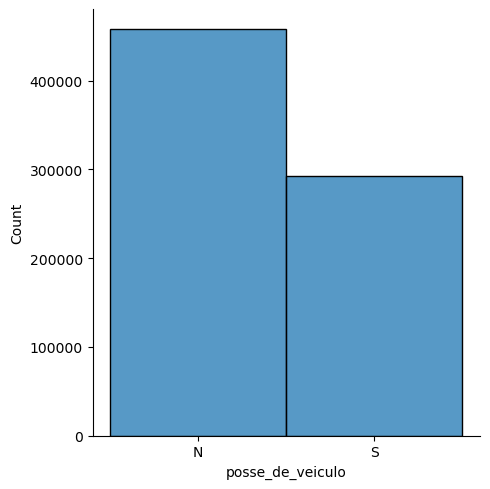

In [103]:
plt.clf()
var = "posse_de_veiculo"
sns.displot(cs, x = var, bins = 50)
plt.show()

In [104]:
cs.posse_de_imovel.value_counts()

S    503692
N    246308
Name: posse_de_imovel, dtype: int64

<Figure size 640x480 with 0 Axes>

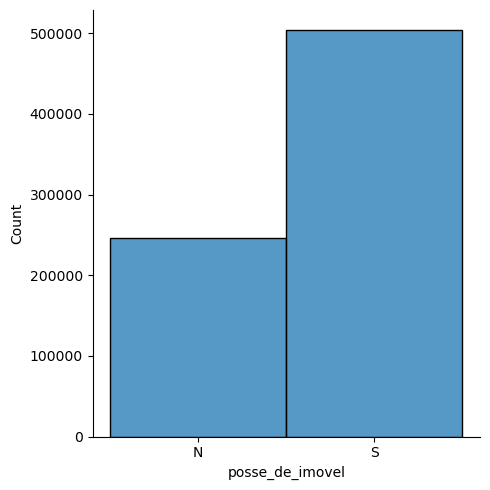

In [105]:
plt.clf()
var = "posse_de_imovel"
sns.displot(cs, x = var, bins = 50)
plt.show()

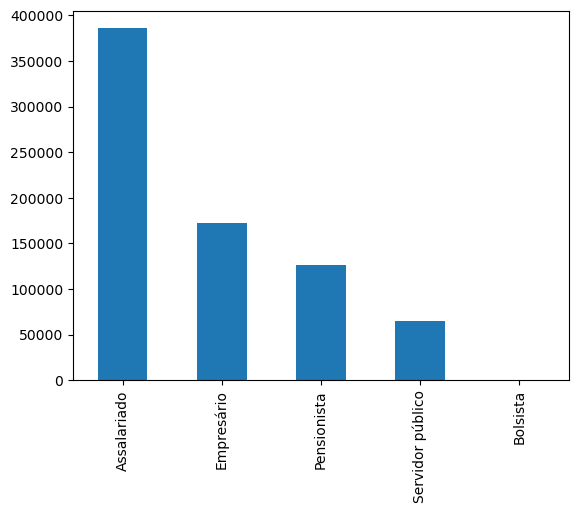

In [106]:
var = 'tipo_renda'
grafico_barras = cs[var].value_counts().plot.bar()

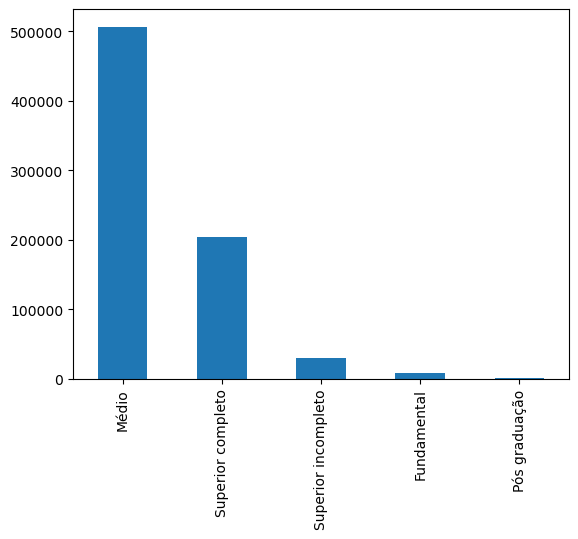

In [107]:
var = 'educacao'
grafico_barras = cs[var].value_counts().plot.bar()

<Figure size 640x480 with 0 Axes>

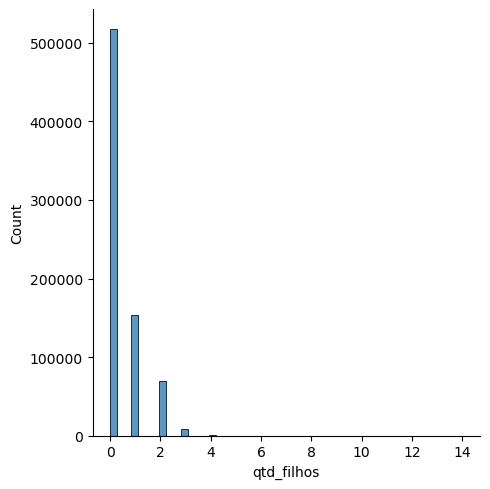

In [108]:
plt.clf()
var = "qtd_filhos"
sns.displot(cs, x = var, bins = 50)
plt.show()

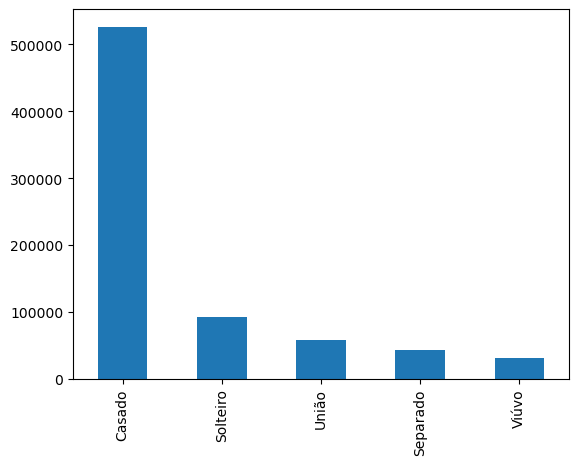

In [109]:
var = 'estado_civil'
grafico_barras = cs[var].value_counts().plot.bar()

<Figure size 640x480 with 0 Axes>

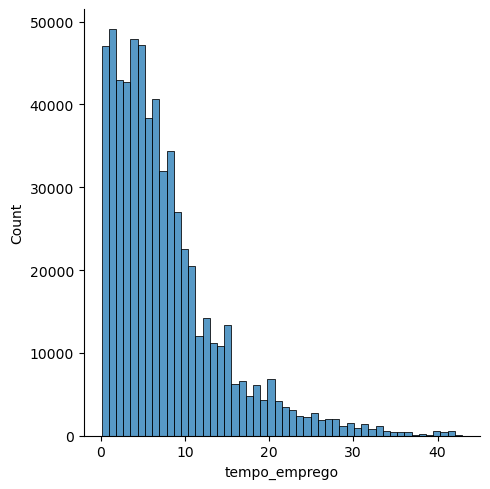

In [110]:
plt.clf()
var = "tempo_emprego"
sns.displot(cs, x = var, bins = 50)
plt.show()

<Figure size 640x480 with 0 Axes>

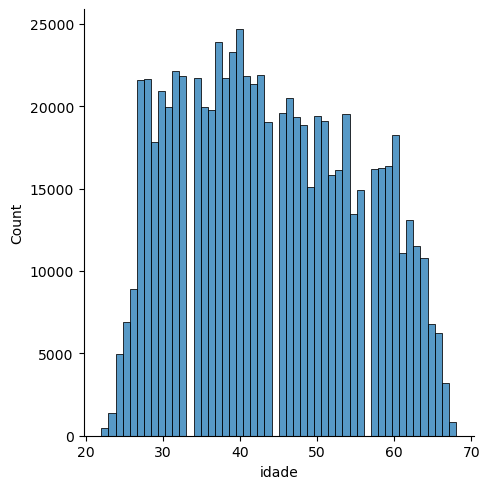

In [111]:
plt.clf()
var = "idade"
sns.displot(cs, x = var, bins = 50)
plt.show()

<Figure size 640x480 with 0 Axes>

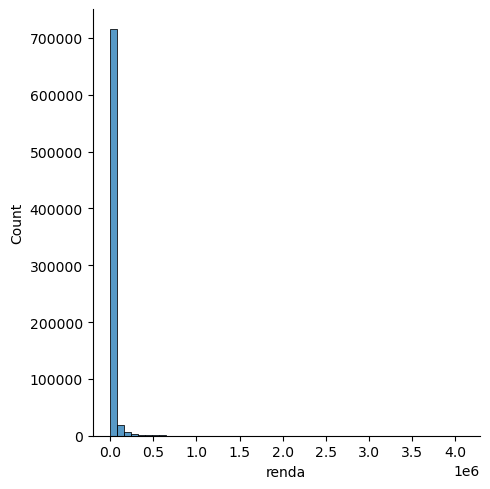

In [112]:
plt.clf()
var = "renda"
sns.displot(cs, x = var, bins = 50)
plt.show()

In [113]:
cs.renda.value_counts()

6193.97      32
1926.67      27
13317.81     26
3439.16      26
3564.05      25
             ..
4047.17       1
4343.93       1
150568.65     1
1792.19       1
3607.09       1
Name: renda, Length: 142419, dtype: int64

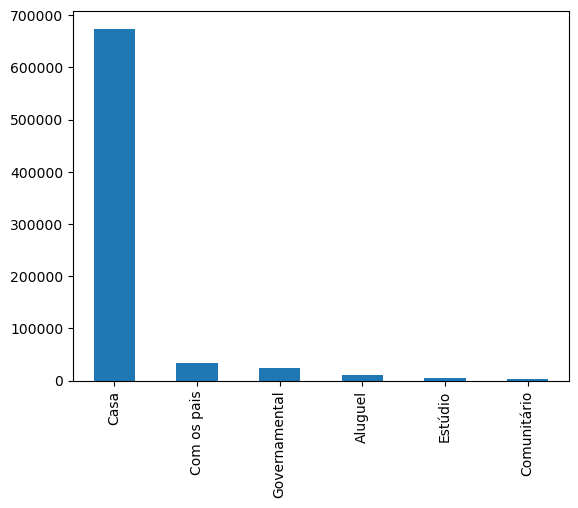

In [114]:
var = 'tipo_residencia'
grafico_barras = cs[var].value_counts().plot.bar()

## Descritiva bivariada

Faça uma análise descritiva bivariada de cada variável

<AxesSubplot:xlabel='sexo', ylabel='mau'>

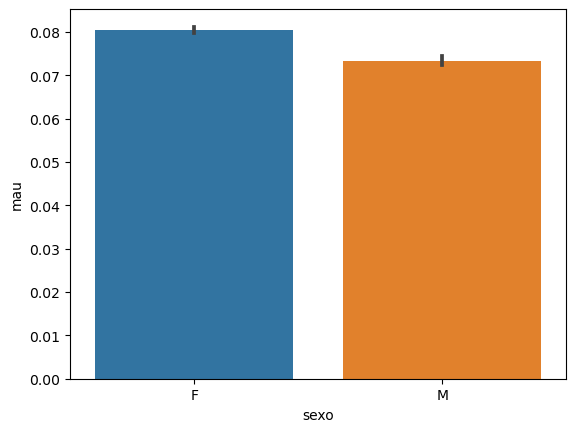

In [115]:
sns.barplot(x='sexo', y = 'mau', data=cs)

<AxesSubplot:xlabel='posse_de_veiculo', ylabel='mau'>

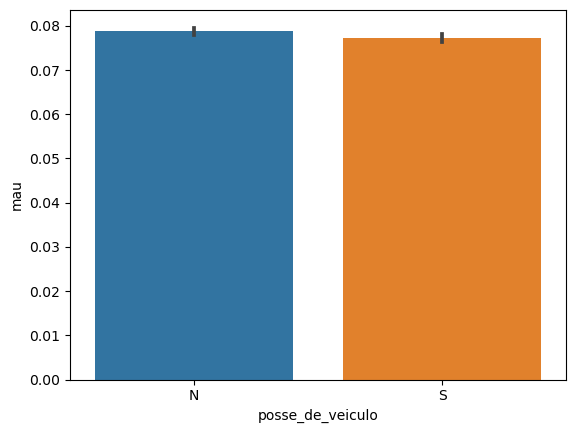

In [116]:
sns.barplot(x='posse_de_veiculo', y = 'mau', data=cs)

<AxesSubplot:xlabel='posse_de_imovel', ylabel='mau'>

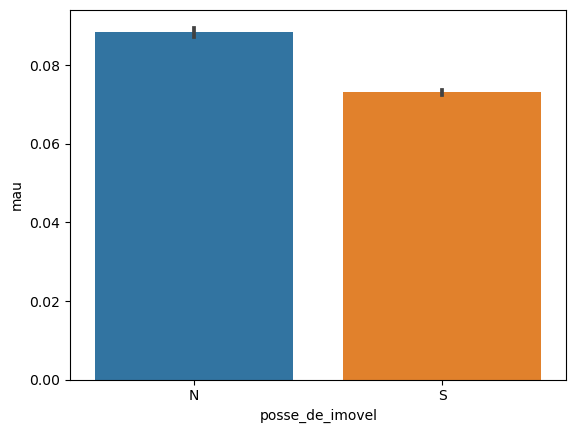

In [117]:
sns.barplot(x='posse_de_imovel', y = 'mau', data=cs)

<AxesSubplot:xlabel='tipo_renda', ylabel='mau'>

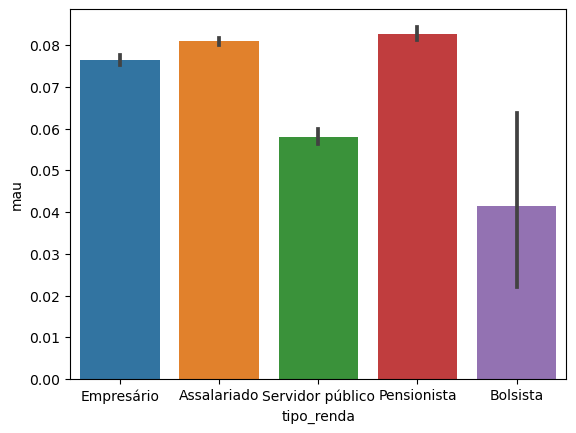

In [118]:
sns.barplot(x='tipo_renda', y = 'mau', data=cs)

<AxesSubplot:xlabel='estado_civil', ylabel='mau'>

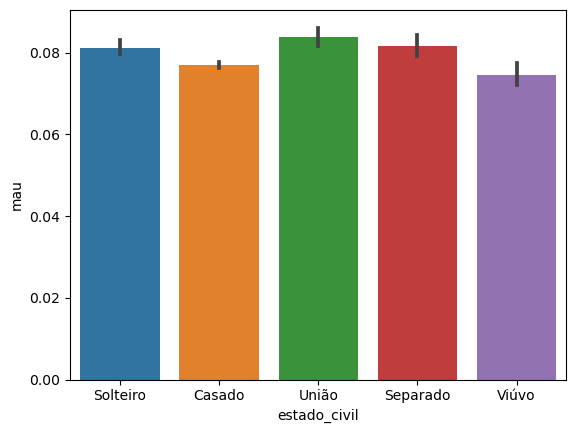

In [119]:
sns.barplot(x='estado_civil', y = 'mau', data=cs)

In [120]:
pd.crosstab(cs['mau'], cs['qtd_filhos'])

qtd_filhos,0,1,2,3,4,5,7,14
mau,,,,,,,,
False,477683,140345,64142,7951,999,81,83,73
True,39648,12676,5490,718,66,14,18,13


In [121]:
pd.crosstab(cs['mau'], cs['educacao'])

educacao,Fundamental,Médio,Pós graduação,Superior completo,Superior incompleto
mau,,,,,
False,7789,466106,753,189684,27025
True,786,40730,59,14622,2446


In [122]:
pd.crosstab(cs['mau'], cs['tipo_residencia'])

tipo_residencia,Aluguel,Casa,Com os pais,Comunitário,Estúdio,Governamental
mau,,,,,,
False,9416,622288,30086,3012,5042,21513
True,933,52006,3146,278,353,1927


In [123]:
pd.crosstab(cs['mau'], cs['idade'])

idade,22,23,24,25,26,27,28,29,30,31,...,59,60,61,62,63,64,65,66,67,68
mau,,,,,,,,,,,,,,,,,,,,,
False,454,1232,4331,6159,7954,19269,19567,16208,18956,18169,...,15182,17008,10174,12117,10536,9913,6229,5774,2971,779
True,41,170,618,752,937,2330,2079,1592,1970,1762,...,1166,1267,916,968,974,888,563,448,228,76


In [124]:
pd.crosstab(cs['mau'], cs['renda'])

renda,107.67,109.21,113.36,117.12,118.69,123.09,123.69,127.04,128.86,131.52,...,2993543.70,2995195.62,3019480.45,3049630.03,3155338.28,3293424.46,3307351.54,3607412.81,3728517.03,4083986.22
mau,,,,,,,,,,,,,,,,,,,,,
False,0,0,2,2,0,0,0,1,2,4,...,4,2,7,1,3,6,3,5,5,2
True,3,4,2,2,2,2,2,4,3,1,...,0,0,0,0,0,0,0,0,0,0


## Desenvolvimento do modelo

Desenvolva um modelo de *credit scoring* através de uma regressão logística.

- Trate valores missings e outliers
- Trate 'zeros estruturais'
- Faça agrupamentos de categorias conforme vimos em aula
- Proponha uma equação preditiva para 'mau'
- Caso hajam categorias não significantes, justifique

In [125]:
cs.isna().sum()

data_ref                      0
index                         0
sexo                          0
posse_de_veiculo              0
posse_de_imovel               0
qtd_filhos                    0
tipo_renda                    0
educacao                      0
estado_civil                  0
tipo_residencia               0
idade                         0
tempo_emprego            125957
qt_pessoas_residencia         0
renda                         0
mau                           0
dtype: int64

In [126]:
cs['tempo_emprego'].fillna(cs['tempo_emprego'].mean())

0          6.873973
1          4.526027
2          0.243836
3         12.772603
4          8.432877
            ...    
749995     3.038356
749996     7.748574
749997    10.375342
749998    13.780822
749999    10.375342
Name: tempo_emprego, Length: 750000, dtype: float64

In [127]:
metadados = pd.DataFrame(cs.dtypes, columns=['dtype'])
metadados['valores_unicos'] = cs.nunique()

metadados

,dtype,valores_unicos
data_ref,datetime64[ns],15
index,int64,16650
sexo,object,2
posse_de_veiculo,object,2
posse_de_imovel,object,2
qtd_filhos,int64,8
tipo_renda,object,5
educacao,object,5
estado_civil,object,5
tipo_residencia,object,6


In [128]:
cs['mau'] = cs.mau.astype('int64')

In [129]:
def IV(variavel, resposta):
    tab = pd.crosstab(variavel, resposta, margins=True, margins_name='total')

    rótulo_evento = tab.columns[0]
    rótulo_nao_evento = tab.columns[1]

    tab['pct_evento'] = tab[rótulo_evento]/tab.loc['total',rótulo_evento]
    tab['ep'] = tab[rótulo_evento]/tab.loc['total',rótulo_evento]
    
    tab['pct_nao_evento'] = tab[rótulo_nao_evento]/tab.loc['total',rótulo_nao_evento]
    tab['woe'] = np.log(tab.pct_evento/tab.pct_nao_evento)
    tab['iv_parcial'] = (tab.pct_evento - tab.pct_nao_evento)*tab.woe
    return tab['iv_parcial'].sum()

In [130]:
iv_sexo = IV(cs.sexo, cs.mau)
print(f'IV da variável SEXO: {iv_sexo:.1%}')

IV da variável SEXO: 0.2%


In [131]:
metadados = pd.DataFrame(cs.dtypes, columns=['dtype'])
metadados['valores_unicos'] = cs.nunique()
metadados['papel'] = 'covariavel'
metadados.loc['mau','papel'] = 'resposta'
metadados.loc['bom','papel'] = 'resposta'
metadados

,dtype,valores_unicos,papel
data_ref,datetime64[ns],15.0,covariavel
index,int64,16650.0,covariavel
sexo,object,2.0,covariavel
posse_de_veiculo,object,2.0,covariavel
posse_de_imovel,object,2.0,covariavel
qtd_filhos,int64,8.0,covariavel
tipo_renda,object,5.0,covariavel
educacao,object,5.0,covariavel
estado_civil,object,5.0,covariavel
tipo_residencia,object,6.0,covariavel


In [132]:
var='idade'
IV(pd.qcut(cs[var],5,duplicates='drop'), cs.mau)

0.01796842289500074

In [133]:
for var in metadados[metadados.papel=='covariavel'].index:
    if (metadados.loc[var, 'valores_unicos']>6):
        metadados.loc[var, 'IV'] = IV(pd.qcut(cs[var],5,duplicates='drop'), cs.mau)
    else:
        metadados.loc[var, 'IV'] = IV(cs[var], cs.mau)
        
        
metadados

,dtype,valores_unicos,papel,IV
data_ref,datetime64[ns],15.0,covariavel,0.345982
index,int64,16650.0,covariavel,0.002664
sexo,object,2.0,covariavel,0.002185
posse_de_veiculo,object,2.0,covariavel,0.000108
posse_de_imovel,object,2.0,covariavel,0.009693
qtd_filhos,int64,8.0,covariavel,0.000030
tipo_renda,object,5.0,covariavel,0.009360
educacao,object,5.0,covariavel,0.003547
estado_civil,object,5.0,covariavel,0.001126
tipo_residencia,object,6.0,covariavel,0.003045


In [134]:
def biv_discreta(var, cs):
    cs['bom'] = 1-cs.mau
    g = cs.groupby(var)
    
    biv = pd.DataFrame({'qt_bom': g['bom'].sum(),
                       'qt_mau': g['bom'].sum(),
                       'mau':g['bom'].mean(),
                       var: g['bom'].mean().index,
                       'cont':g[var].count()})
    biv['ep'] = (biv.mau*(1-biv.mau)/biv.cont)**.5
    biv['mau_sup'] = biv.mau+t.ppf([0.975], biv.cont-1)*biv.ep
    biv['mau_inf'] = biv.mau+t.ppf([0.025], biv.cont-1)*biv.ep
    
    biv['logit'] = np.log(biv.mau/(1-biv.mau))
    biv['logit_sup'] = np.log(biv.mau_sup/(1-biv.mau_sup))
    biv['logit_inf'] = np.log(biv.mau_sup/(1-biv.mau_inf))
    
    tx_mau_geral = cs.mau.mean()
    woe_geral = np.log(cs.mau.mean() / (1 - cs.mau.mean()))
    
    biv['woe'] = biv.logit - woe_geral
    biv['woe_sup'] = biv.logit_sup - woe_geral
    biv['woe_inf'] = biv.logit_inf - woe_geral
    
    fig, ax = plt.subplots(2,1, figsize=(8,6))
    ax[0].plot(biv[var], biv.woe,  ':bo', label='woe')
    ax[0].plot(biv[var], biv.woe_sup, 'o:r', label='limite superior')
    ax[0].plot(biv[var], biv.woe_inf, 'o:r', label='limite superior')
        
    num_cat = biv.shape[0]
    ax[0].set_xlim([-.3, num_cat-.7])
    
    ax[0].set_ylabel("Weight of Evidence")
    ax[0].legend(bbox_to_anchor=(.83, 1.17), ncol=3)
    
    ax[0].set_xticks(list(range(num_cat)))
    ax[0].set_xticklabels(biv[var], rotation=15)
    
    ax[1] = biv.cont.plot.bar()
    return biv

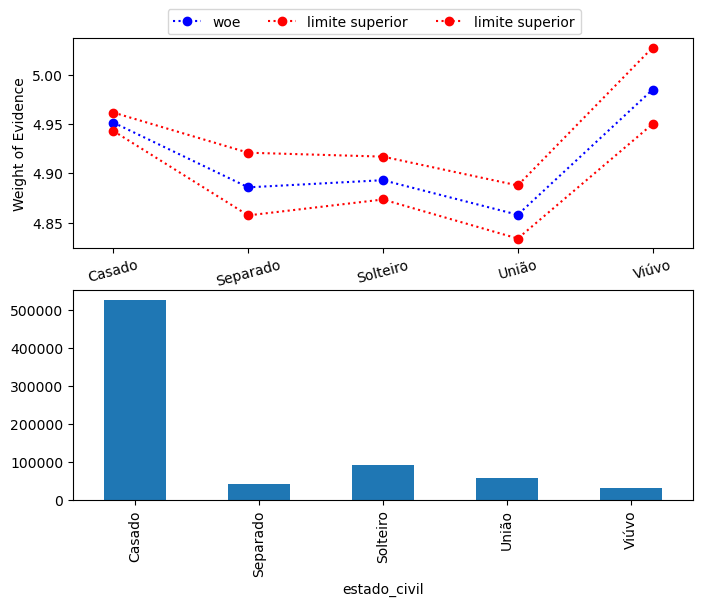

In [135]:
biv_discreta('estado_civil', cs);

,qt_bom,qt_mau,mau,tipo_renda,cont,ep,mau_sup,mau_inf,logit,logit_sup,logit_inf,woe,woe_sup,woe_inf
tipo_renda,,,,,,,,,,,,,,
Assalariado,354527,354527,0.919083,Assalariado,385740,0.000439,0.919943,0.918222,2.429950,2.441578,2.420306,4.897138,4.908766,4.887495
Bols./SerPubl,61497,61497,0.942006,Bols./SerPubl,65283,0.000915,0.943799,0.940213,2.787678,2.820985,2.759132,5.254866,5.288173,5.226320
Empresário,159508,159508,0.923549,Empresário,172712,0.000639,0.924802,0.922296,2.491574,2.509458,2.476671,4.958762,4.976646,4.943859
Pensionista,115825,115825,0.917317,Pensionista,126265,0.000775,0.918836,0.915798,2.406436,2.426634,2.389885,4.873624,4.893822,4.857073


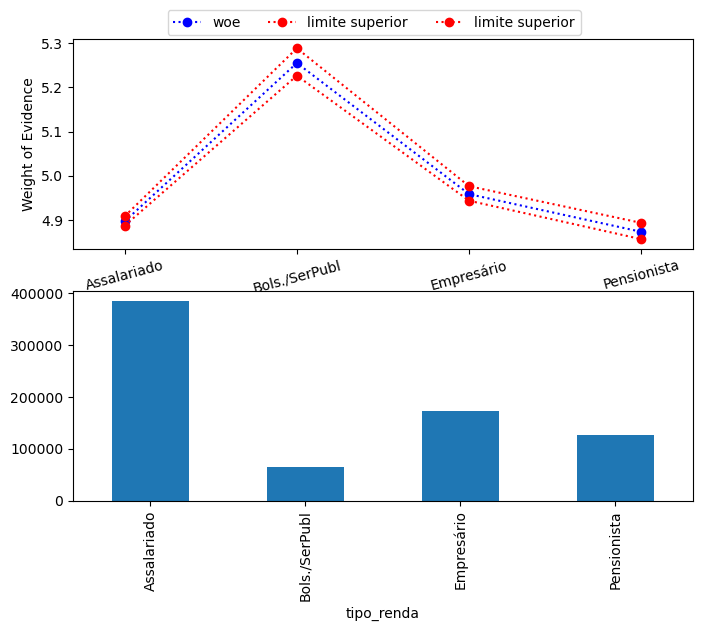

In [136]:
cs2 = cs.copy()
cs2.tipo_renda.replace({'Bolsista': 'Bols./SerPubl', 'Servidor público': 'Bols./SerPubl'}, inplace=True)
biv_discreta('tipo_renda', cs2)

In [137]:
IV(cs2.tipo_renda, cs.mau)

0.009314630323182816

,qt_bom,qt_mau,mau,educacao,cont,ep,mau_sup,mau_inf,logit,logit_sup,logit_inf,woe,woe_sup,woe_inf
educacao,,,,,,,,,,,,,,
Fundamental,7789,7789,0.908338,Fundamental,8575,0.003116,0.914446,0.902230,2.293511,2.369175,2.235701,4.760699,4.836363,4.702889
Médio,466106,466106,0.919639,Médio,506836,0.000382,0.920387,0.918890,2.437448,2.447619,2.428992,4.904636,4.914807,4.896180
Sup.Compl/PosGra,190437,190437,0.928427,Sup.Compl/PosGra,205118,0.000569,0.929542,0.927311,2.562767,2.579677,2.548502,5.029955,5.046865,5.015690
Superior incompleto,27025,27025,0.917003,Superior incompleto,29471,0.001607,0.920153,0.913853,2.402308,2.444427,2.368489,4.869496,4.911615,4.835677


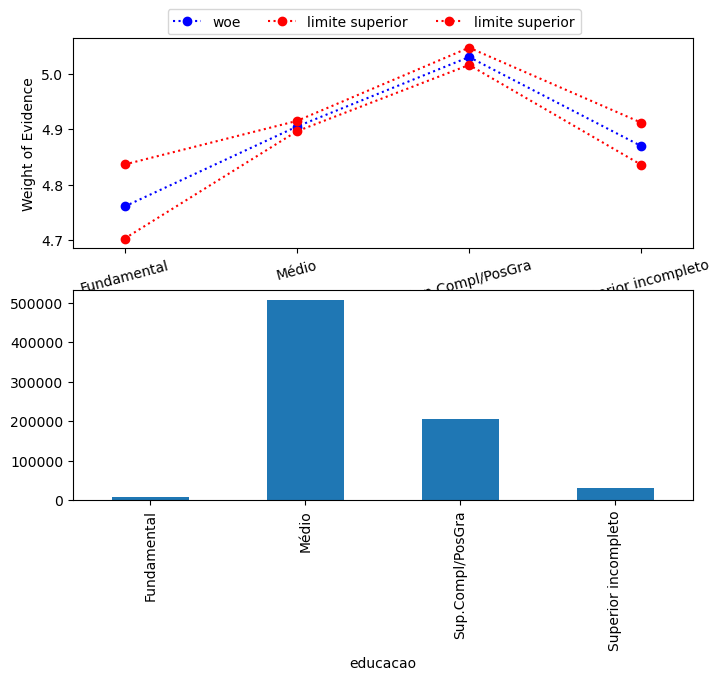

In [138]:
cs2.educacao.replace({'Superior completo': 'Sup.Compl/PosGra', 'Pós graduação': 'Sup.Compl/PosGra'}, inplace=True)
biv_discreta('educacao', cs2)

0.0023941390471014087

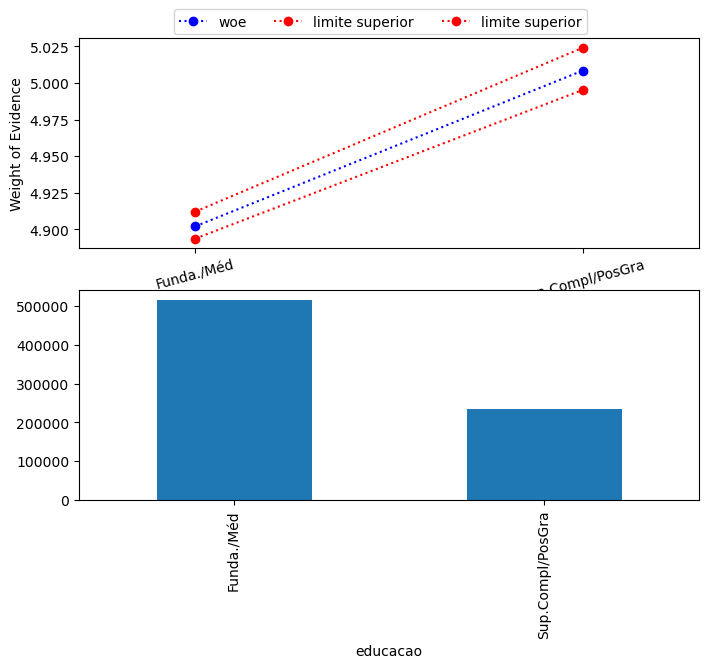

In [139]:
cs2.educacao.replace({'Superior incompleto':'Sup.Compl/PosGra', 
                      'Fundamental':'Funda./Méd',
                      'Médio': 'Funda./Méd'
                     }, inplace=True)
biv_discreta('educacao', cs2)
IV(cs2.educacao, cs.mau)

## Avaliação do modelo


Avalie estas métricas nas bases de desenvolvimento e *out of time*.

In [140]:
pd.crosstab(cs['mau'], date['oot'])

oot,2016-01-01,2016-02-01,2016-03-01
mau,,,
0,1,1,1
